In [ ]:
import plotly.plotly as py  
py.sign_in('oldzhangbuythings', 'j8IlrfpZl9qUbRXU3ZQm')
import plotly.tools as tls   
from plotly.graph_objs import *

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import quandl as q
q.ApiConfig.api_key = "R8WuAzDWGs-WFHsyJo25"
import numpy as np
import pandas as pd


In [11]:
hike_cycle = pd.read_csv('data_cleaned/rate_hike_circles.csv', index_col=0)
recession_cycle = pd.read_csv('data_cleaned/recession_circles.csv', index_col=0)

gdp_us = pd.read_csv('data_cleaned/real_gdp_index.csv', index_col=0)
gdp_us.index = gdp_us.index.to_datetime()
mask = (gdp_us.index >= '1978-01-03')
gdp_us = gdp_us[mask]

fed_rate = pd.read_csv('data_cleaned/effr_cleaned.csv', index_col=0)
fed_rate.index = fed_rate.index.to_datetime()
mask = (fed_rate.index >= '1978-01-03')
fed_rate = fed_rate[mask]

cpi_us = pd.read_csv('data_raw/cpi_rate.csv', index_col=0)
cpi_us.index = cpi_us.index.to_datetime()
mask = (cpi_us.index >= '1978-01-03')
cpi_us = cpi_us[mask]

dx = pd.read_csv('data_raw/dx_f_m.csv', index_col=0)
dx.index = dx.index.to_datetime()
mask = (dx.index >= '1978-01-03')
dx = dx[mask]

gold = pd.read_csv('data_raw/gc_f_m.csv', index_col=0)
gold.index = gold.index.to_datetime()
mask = (gold.index >= '1978-01-03')
gold = gold[mask]

un_rate = pd.read_csv('data_raw/un_rate_us.csv', index_col=0)
un_rate.index = un_rate.index.to_datetime()
mask = (un_rate.index >= '1978-01-03')
un_rate = un_rate[mask]


In [12]:
y10y2 = pd.read_csv('data_raw/T10Y2Y.csv', index_col=0)
y10y2.index = y10y2.index.to_datetime()
mask = (y10y2.T10Y2Y != '.')
y10y2 = y10y2[mask]
y10y2.T10Y2Y = y10y2.T10Y2Y.astype('float')

In [93]:
sp500 = q.get('YAHOO/INDEX_GSPC')
mask_1 = (sp500.index >= '1978-01-03')
sp500 = sp500[mask_1]

vix_raw = q.get('YAHOO/INDEX_VIX', collapse='monthly')
dji_raw = q.get('YAHOO/INDEX_DJI')

In [15]:
pmi_new_oder = q.get('ISM/MAN_NEWORDERS')
pmi = q.get('ISM/MAN_PMI')

In [27]:
tcu = pd.read_csv('data_raw/tcu_rate.csv', index_col=0)
tcu.index = tcu.index.to_datetime()

In [33]:
wholesale = pd.read_csv('data_raw/wholesale_sale_rate.csv', index_col=0)
wholesale.index = wholesale.index.to_datetime()

In [53]:
business_inventory = pd.read_csv('data_raw/business_inventory_rate.csv', index_col=0)
business_inventory.index = business_inventory.index.to_datetime()

In [78]:
output_gap = pd.read_csv('data_raw/output_gap.csv', index_col=0)
output_gap.index = output_gap.index.to_datetime()
output_gap = output_gap[output_gap.iloc[:, 0] != '.']
output_gap.iloc[:, 0] = output_gap.iloc[:, 0].astype('float')

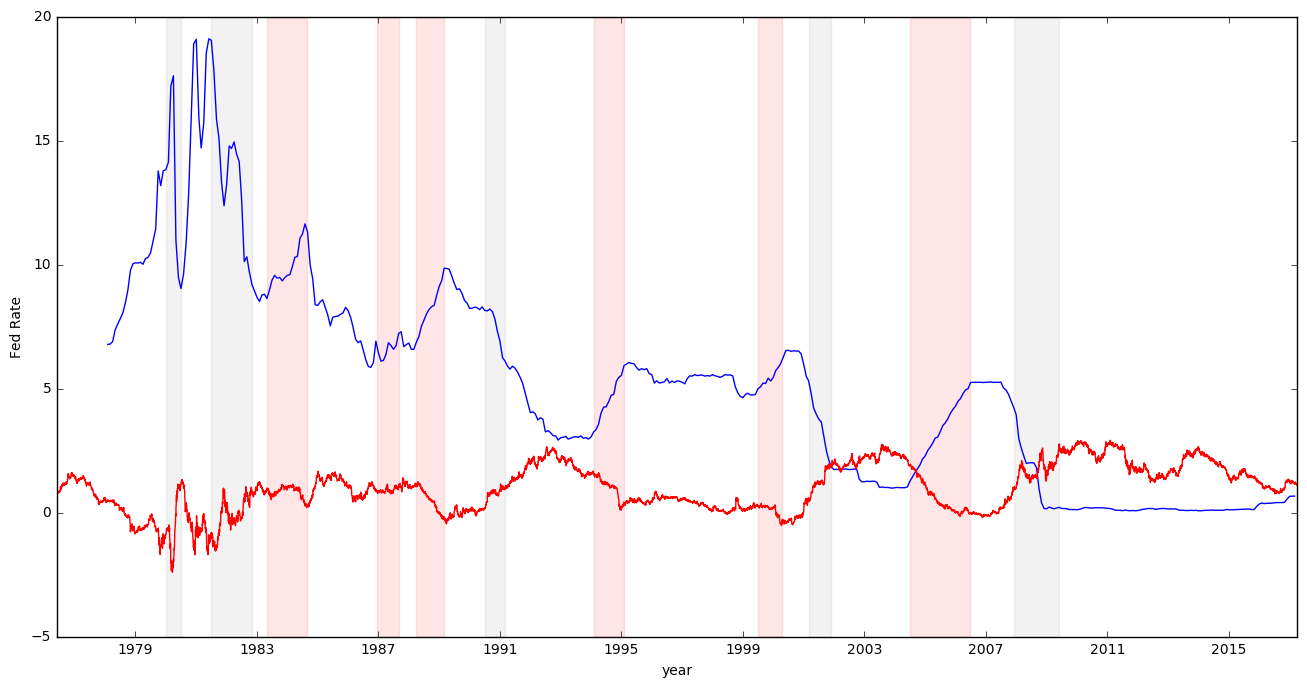

In [104]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(fed_rate.index, fed_rate.FEDFUNDS)
#ax1.plot(pmi.index, pmi['Index'])
ax1.plot(y10y2.index, y10y2['T10Y2Y'], 'r')

#ax1.plot(tcu.index, tcu.TCU_PC1)
#ax1.plot(wholesale.index, wholesale.iloc[:, 0])
#ax1.plot(business_inventory.index, business_inventory.iloc[:, 0])
#ax1.plot(output_gap.index, output_gap.iloc[:,0])


#ax1.set_xlim([datetime.date(2006, 1, 26), datetime.date(2017, 4, 1)])
#plt.plot((pmi.index[0], pmi.index[-1]), (50, 50), 'k-')
plt.xlabel('year')
plt.ylabel('Fed Rate')
for i in xrange(6):
    ax1.axvspan(hike_cycle.iloc[i, 0], hike_cycle.iloc[i, 1], alpha=0.1, color='red')
    if i < 5:
        ax1.axvspan(recession_cycle.iloc[i, 0], recession_cycle.iloc[i, 1], alpha=0.1, color='grey')
#ax2 = ax1.twinx()
#ax2.plot(sp500.index, sp500['Adjusted Close'], 'r')
#ax2.plot(dji_raw.index, dji_raw['Adjusted Close'], 'r')    
#ax2.plot(vix.index, vix['Adjusted Close'], 'r')
#ax2.plot(dx.index, dx['Close'], 'r')
#ax2.plot(gold.index, gold['Close'], 'r')
#ax2.plot(un_rate.index, un_rate['UNRATE'], 'r')
#ax2.plot(pmi.index, pmi['Index'], 'r')
#ax2.plot(output_gap.index, output_gap.iloc[:,0], 'r')
#ax2.plot(pmi_new_oder.index, pmi_new_oder['Diffusion Index'], 'r')
#ax2.set_xlim([datetime.date(1982, 1, 26), datetime.date(2017, 4, 1)])
#plt.plot((pmi.index[0], pmi.index[-1]), (50, 50), 'k-')
#ax2.plot(un_rate.index, un_rate['UNRATE'], 'r')
#ax2.plot(y10y2.index, y10y2['T10Y2Y'], 'r')

#py.iplot_mpl(fig, filename='fed_rates_hike')

In [ ]:
gdp_rate = pd.read_csv('data_raw/gdp_real_rate.csv', index_col=0)
gdp_rate.index = gdp_rate.index.to_datetime()
mask = (gdp_rate.index >= '1998-01-03')
gdp_rate = gdp_rate[mask]

In [ ]:
pce = pd.read_csv('data_raw/pce_rate.csv', index_col=0)
pce.index = pce.index.to_datetime()
mask = (pce.index >= '1998-01-03')
pce = pce[mask]

In [ ]:
tcu = pd.read_csv('data_raw/TCU_rate.csv', index_col=0)
tcu.index = tcu.index.to_datetime()
mask = (tcu.index >= '1998-01-03')
tcu = tcu[mask]

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(pce.index, pce.iloc[:, 0])

#ax1.plot(gdp_rate.index, gdp_rate.iloc[:, 0])
plt.xlabel('year')
plt.ylabel('Fed Rate')
#for i in xrange(6):
    #ax1.axvspan(hike_cycle.iloc[i, 0], hike_cycle.iloc[i, 1], alpha=0.3, color='red')
#    if i < 5:
#        ax1.axvspan(recession_cycle.iloc[i, 0], recession_cycle.iloc[i, 1], alpha=0.1, color='grey')
ax2 = ax1.twinx()
ax2.plot(tcu.index, tcu.iloc[:, 0], 'r')
#ax2.plot(dji.index, dji['Adjusted Close'], 'r')    
#ax2.plot(vix.index, vix['Adjusted Close'], 'r')
#ax2.plot(dx.index, dx['Close'], 'r')
#ax2.plot(gold.index, gold['Close'], 'r')
#ax2.plot(un_rate.index, un_rate['UNRATE'], 'r')
#ax2.plot(un_rate.index, un_rate['UNRATE'], 'r')
#ax2.plot(y10y2.index, y10y2['T10Y2Y'], 'r')

#ax2.plot(gdp_plot.DATE, gdp_plot.GDP, 'r')    
#py.iplot_mpl(fig, filename='fed_rates_hike')